# Analysis of Peptide Trajectory

In this notebook, we analyze an all-atom MD simulation of a peptide system in explicit solvent using `MDAnalysis` python pachage. We focus on extracting key structural and dynamic properties relevant for aggregation behavior and peptide phase behavior:

- Backbone RMSD
- Radius of gyration (Rg)

Trajectory: 50 ns with 500 ps timestep
System: 100 short disordered peptides in water and ion solution (water and ions are not present in the .xtc file)

In [14]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.analysis import rms
import seaborn as sns
sns.set(style="whitegrid")

In [15]:
import helpers as h

In [17]:
%load_ext autoreload
%autoreload 2

### Loading the trajectory

In [16]:
u, times, chains = h.init_trj('../data/initial.pdb','../data/pbc.md.xtc')

Trjectory of 101 frames of 50000.0 ps with a timestep of 500.0 ps
There is 9400 total atoms ( 100 chains each of 94 atoms )
Unique residues  ['ACE' 'GLN' 'GLY' 'NME' 'TYR']


In [9]:
nchains = len(chains)
nframes = len(times)

### RMSD of Backbone

In [10]:
Rmsd = np.zeros((nchains,nframes))
for ich,chain in enumerate(chains):
    Rmsd_ch = rms.RMSD(chain, select='backbone')
    Rmsd_ch.run()
    Rmsd[ich] = Rmsd_ch.rmsd[:,2] 

/Users/lisabere/opt/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


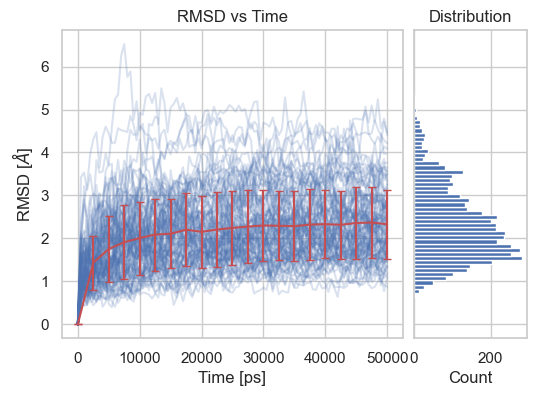

In [11]:
fig,ax = plt.subplots(1,2,figsize=(6,4), sharex=False, sharey=True, gridspec_kw={"width_ratios" : [3,1], "wspace" : 0.05})
h.plot_timeseries(ax[0],Rmsd,times,'RMSD')
h.plot_histo(ax[1],Rmsd,nframes,50)
h.save_png(fig,'../figures/rmsd.png')

### Radius of Gyration

In [12]:
Rgs = []

for ts in u.trajectory:
    Rg_ch = []
    for chain in chains:
        Rg = chain.radius_of_gyration()
        Rg_ch.append(Rg)
    Rgs.append(Rg_ch)

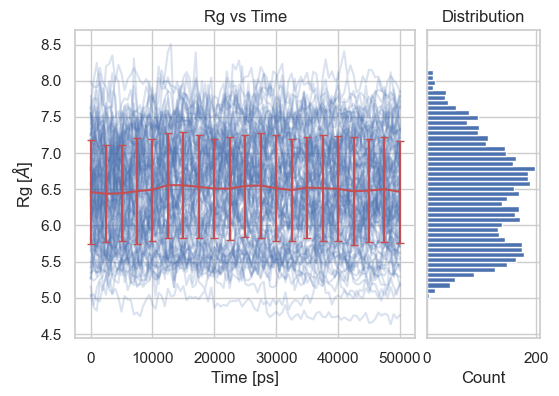

In [13]:
fig,ax = plt.subplots(1,2,figsize=(6,4), sharex=False, sharey=True, gridspec_kw={"width_ratios" : [3,1], "wspace" : 0.05})
h.plot_timeseries(ax[0],np.array(Rgs).T,times,'Rg')
h.plot_histo(ax[1],Rgs,nframes,50)
h.save_png(fig,'../figures/gyrate.png')